In [1]:
import importlib
import tensorflow as tf
from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

#import ensembles
#importlib.reload(ensembles)

import networks
importlib.reload(networks)
from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 5]
%matplotlib inline


from ensembles import BootstrapThroughTimeBobStrap,BootstrapEnsemble, ForcedDiversityBootstrapThroughTime3

from base import EnsembleNetwork
from networks import DropoutNetwork, NlpdNetwork, LrNetwork
 

/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Linear

In [2]:
num_meta_epochs = 3# 100#100#10
num_epochs = 10#15#10#3#50#50#15#5#25#50
seed = 100#50#430#45#42

num_samples = 200
dataset_params = {'seed':seed,'num_samples':num_samples}
num_neurons = [10,10,10]
num_layers=len(num_neurons)
num_neurons_nonlinear = [10,10,10,10,5]
learning_rate = 0.001#None#1/num_epochs
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal, 'activations': [tf.nn.leaky_relu]*num_layers,
               'num_epochs':None,
                'seed':seed,
                'learning_rate':learning_rate,
                'num_neurons':num_neurons,
               'l2':True}


#{   'params': {   'activations': [   <function leaky_relu at 0x11fcedd08>,
#                                     <function leaky_relu at 0x11fcedd08>,
#                                     <function leaky_relu at 0x11fcedd08>],
 #                 'initialisation_scheme': tf.contrib.layers.xavier_initializer,
 #                 'learning_rate': 0.001,
 #                 'num_neurons': [10, 10, 10],
 #                 'seed': 100},
 #   'score': 0.0882077880301202,
 #   'var': 2.441656843781423e-05}

## Dropout

{   'params': {   'activations': [   <function leaky_relu at 0x11fcedd08>,
                                     <function leaky_relu at 0x11fcedd08>,
                                     <function leaky_relu at 0x11fcedd08>],
                  'initialisation_scheme': <function xavier_initializer at 0x1a25821400>,
                  'learning_rate': 0.001,
                  'num_neurons': [10, 10, 10],
                  'seed': 100},
    'score': 0.0882077880301202,
    'var': 2.441656843781423e-05}

In [3]:
num_meta_epochs = 25# 100#100#10
num_epochs = 10#15#10#3#50#50#15#5#25#50
seed = 100#50#430#45#42

num_samples = 200
dataset_params = {'seed':seed,'num_samples':num_samples}
num_neurons = [10,10,10]
num_layers=len(num_neurons)
num_neurons_nonlinear = [10,10,10,10,5]
learning_rate = 0.001#None#1/num_epochs
dropout_model_params = {'initialisation_scheme':tf.contrib.layers.xavier_initializer, #tf.keras.initializers.he_normal,
                        'activations': [tf.nn.leaky_relu]*num_layers,
               'num_epochs':None,
                'seed':seed,
                'learning_rate':learning_rate,
                'num_neurons':num_neurons,
               'l2':True}



experiment started at 2018-08-10 23:38:14.387827
experiment number 1 took 11.459118127822876 seconds. That means the whole run will probably take 286.4779531955719 more seconds and 4.774632553259532 more minutes.
experiment number 11 took 5.337001085281372 seconds. That means the whole run will probably take 110.62880808656865 more seconds and 1.8438134681094775 more minutes.
experiment number 21 took 7.016957759857178 seconds. That means the whole run will probably take 33.29340367090134 more seconds and 0.554890061181689 more minutes.
overall, it took 164.56583404541016 seconds with 25 experiments
          cobeau   coverage       nlpd       rsme
count  25.000000  25.000000  25.000000  25.000000
mean    0.486388   0.886000   0.944927   0.007892
std     0.317574   0.055628   0.011219   0.003031
min     0.003624   0.766667   0.918624   0.004832
25%     0.185584   0.850000   0.940839   0.005796
50%     0.548371   0.900000   0.949644   0.006734
75%     0.765343   0.916667   0.953259   0.

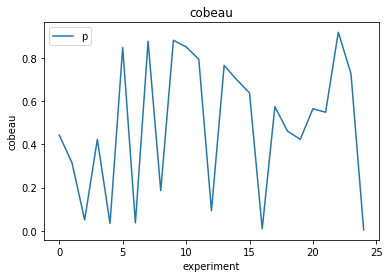

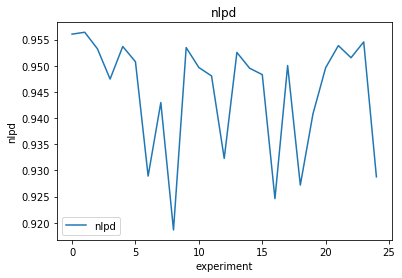

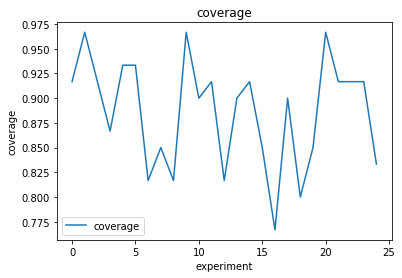

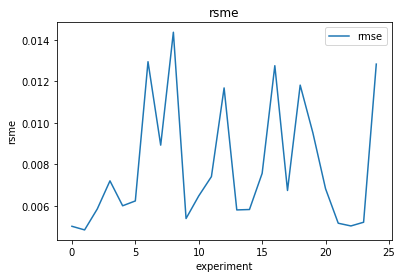

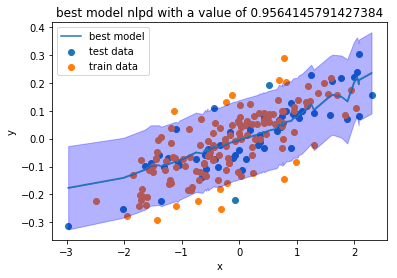

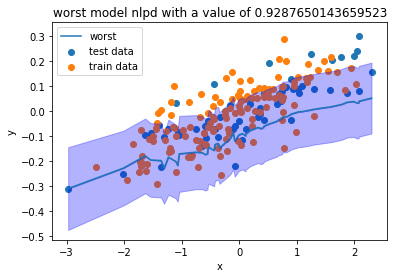

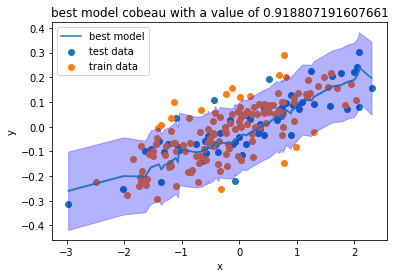

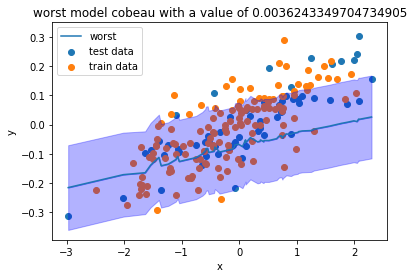

In [4]:
pd_dropout = repeat_experiment(DropoutNetwork, dataset_creation.LinearDataset,
                       num_meta_epochs=num_meta_epochs,model_params=dropout_model_params,dataset_params=dataset_params)

## Bootstrap
{   'params': {   'activations': [   <function tanh at 0x11f7257b8>,
                                     <function tanh at 0x11f7257b8>,
                                     <function tanh at 0x11f7257b8>],
                  'initialisation_scheme': <function xavier_initializer at 0x1a25821400>,
                  'learning_rate': 0.001,
                  'num_neurons': [10, 10, 10],
                  'seed': 100},
    'score': 0.07280524333917246,
    'var': 1.0473625661994142e-05}

In [5]:
seed = 100#50#430#45#42

num_samples = 200
dataset_params = {'seed':seed,'num_samples':num_samples}
num_neurons = [10,10,10]
num_layers=len(num_neurons)
learning_rate = 0.001

bootstrap_model_params = {'initialisation_scheme':tf.contrib.layers.xavier_initializer, #tf.keras.initializers.he_normal,
                        'activations': [tf.nn.tanh]*num_layers,
               'num_epochs':None,
                'seed':seed,
                'learning_rate':learning_rate,
                'num_neurons':num_neurons,
               'l2':False}



experiment started at 2018-08-10 23:41:03.103975
experiment number 1 took 26.781823873519897 seconds. That means the whole run will probably take 669.5455968379974 more seconds and 11.159093280633291 more minutes.
experiment number 11 took 23.62501096725464 seconds. That means the whole run will probably take 422.9655653780157 more seconds and 7.049426089633595 more minutes.
experiment number 21 took 23.208554983139038 seconds. That means the whole run will probably take 128.75153445062185 more seconds and 2.1458589075103642 more minutes.
overall, it took 633.3176748752594 seconds with 25 experiments
          cobeau   coverage       nlpd       rsme
count  25.000000  25.000000  25.000000  25.000000
mean    0.641975   0.012000  -0.072082   0.004969
std     0.225688   0.015605   1.686039   0.000295
min     0.183282   0.000000  -5.069467   0.004567
25%     0.491046   0.000000  -0.484998   0.004718
50%     0.694790   0.000000   0.171742   0.004932
75%     0.793439   0.016667   1.057841   0

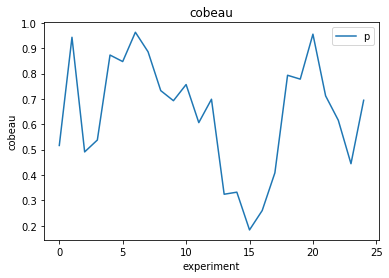

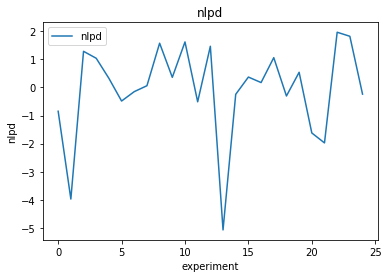

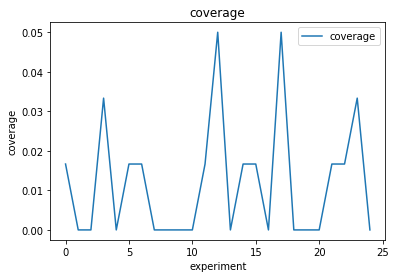

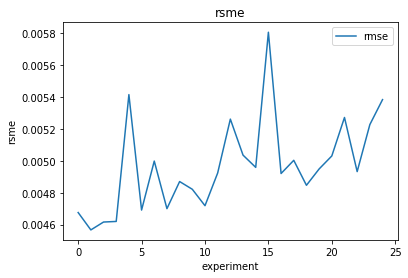

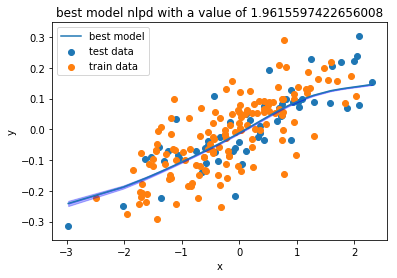

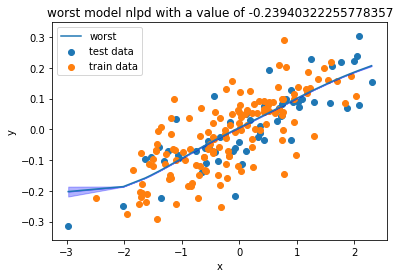

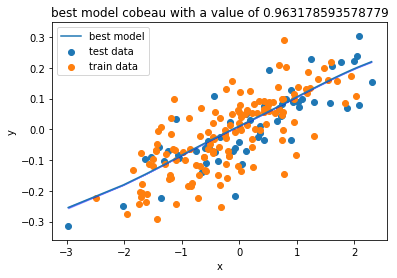

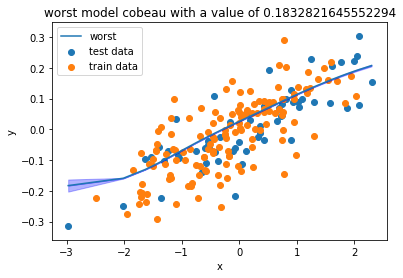

In [6]:
pd_bootstrap = repeat_experiment(BootstrapEnsemble, dataset_creation.LinearDataset,
                                 num_meta_epochs=num_meta_epochs,
                                 model_params=bootstrap_model_params,
                                 dataset_params=dataset_params)

## BootstrapThroughTime

{   'params': {   'activations': [   <function leaky_relu at 0x11fcedd08>,
                                     <function leaky_relu at 0x11fcedd08>,
                                     <function leaky_relu at 0x11fcedd08>],
                  'initialisation_scheme': <function xavier_initializer at 0x1a25821400>,
                  'learning_rate': 0.001,
                  'num_neurons': [2, 3, 2],
                  'seed': 50},

In [7]:
bootstrap_through_time_model_params = {'initialisation_scheme':tf.contrib.layers.xavier_initializer, #tf.keras.initializers.he_normal,
                        'activations': [tf.nn.leaky_relu]*num_layers,
                'seed':50,
                'learning_rate':0.001,
                'num_neurons':[2,3,2],
               'l2':False}



experiment started at 2018-08-10 23:51:40.902665
experiment number 1 took 31.387590885162354 seconds. That means the whole run will probably take 784.6897721290588 more seconds and 13.078162868817648 more minutes.
experiment number 11 took 31.213980197906494 seconds. That means the whole run will probably take 464.56908800385213 more seconds and 7.742818133397535 more minutes.
experiment number 21 took 30.878051042556763 seconds. That means the whole run will probably take 154.90282779648192 more seconds and 2.581713796608032 more minutes.
overall, it took 776.3840279579163 seconds with 25 experiments
             cobeau   coverage       nlpd       rsme
count  2.500000e+01  25.000000  25.000000  25.000000
mean   2.173425e-01   0.056667   0.859015   0.008008
std    3.371885e-01   0.036004   0.985273   0.003281
min    1.205474e-14   0.000000  -2.569671   0.004589
25%    5.840317e-05   0.033333   0.665824   0.005435
50%    5.423879e-02   0.066667   1.167932   0.007168
75%    3.220318e-01 

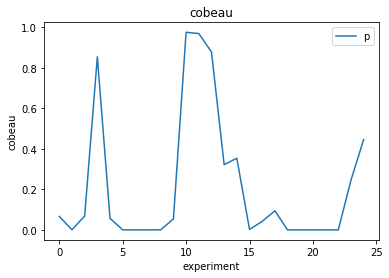

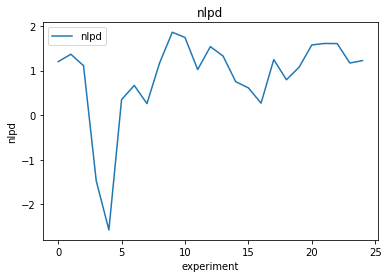

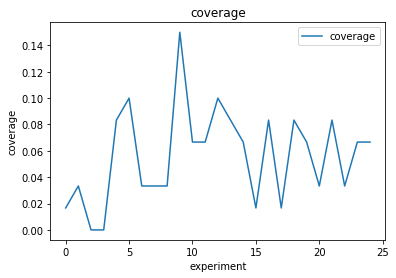

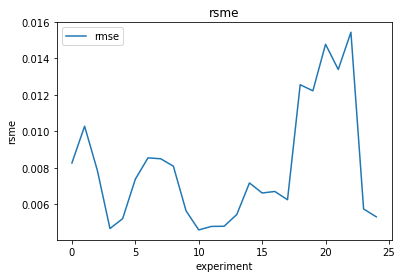

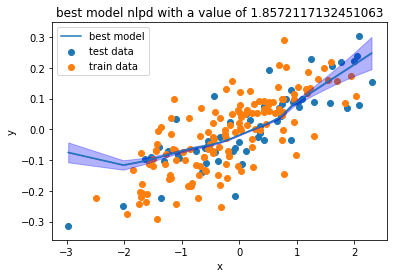

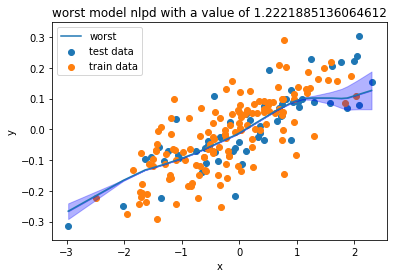

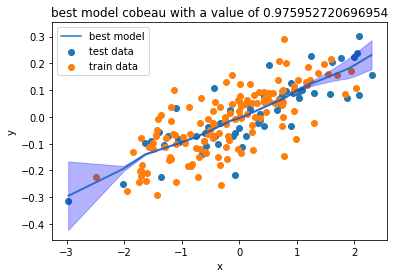

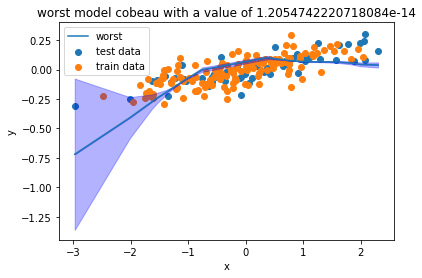

In [8]:
pd_bootstrap = repeat_experiment(BootstrapEnsemble, dataset_creation.LinearDataset,
                                 num_meta_epochs=num_meta_epochs,
                                 model_params=bootstrap_through_time_model_params,
                                 dataset_params=dataset_params)

## Forceddiversity3
{   'params': {   'activations': [   <function leaky_relu at 0x11fcedd08>,
                                     <function leaky_relu at 0x11fcedd08>,
                                     <function leaky_relu at 0x11fcedd08>],
                  'initialisation_scheme': <function xavier_initializer at 0x1a25821400>,
                  'learning_rate': 0.001,
                  'num_neurons': [10, 10, 10],
                  'seed': 100},
    'score': 0.06954891102992625,
    'var': 9.906131142489072e-07}

In [9]:
import ensembles
importlib.reload(ensembles)

<module 'ensembles' from '/Users/thomas/Documents/Master-Thesis/new_version/ensembles.py'>

In [10]:
forceddiversity_params = {'initialisation_scheme':tf.contrib.layers.xavier_initializer, #tf.keras.initializers.he_normal,
                        'activations': [tf.nn.leaky_relu]*num_layers,
                'seed':100,
                'learning_rate':0.001,
                'num_neurons':[10,10,10],
               'l2':True}



experiment started at 2018-08-11 00:04:41.655427
doing a burn in of 3 epochs
experiment number 1 took 3.2773220539093018 seconds. That means the whole run will probably take 81.93305134773254 more seconds and 1.3655508557955425 more minutes.
doing a burn in of 3 epochs
doing a burn in of 3 epochs


/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py:29: RuntimeWarning: divide by zero encountered in log
  logs = np.log(x)


doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
experiment number 11 took 3.487031936645508 seconds. That means the whole run will probably take 49.60916096513922 more seconds and 0.8268193494189869 more minutes.
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
experiment number 21 took 3.138417959213257 seconds. That means the whole run will probably take 16.348393417540052 more seconds and 0.27247322362566756 more minutes.
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
overall, it took 81.79207110404968 seconds with 25 e

/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


          cobeau   coverage       nlpd       rsme
count  25.000000  25.000000  25.000000  25.000000
mean    0.597381   0.004667        inf   0.008629
std     0.429592   0.014845        NaN   0.004898
min     0.000006   0.000000 -28.462927   0.004971
25%     0.035554   0.000000 -12.304655   0.005887
50%     0.723900   0.000000  -1.594802   0.006803
75%     1.000000   0.000000        NaN   0.008989
max     1.000000   0.066667        inf   0.027824
\begin{tabular}{lrrrr}
\toprule
{} &     cobeau &   coverage &       nlpd &       rsme \\
\midrule
count &  25.000000 &  25.000000 &  25.000000 &  25.000000 \\
mean  &   0.597381 &   0.004667 &        inf &   0.008629 \\
std   &   0.429592 &   0.014845 &        NaN &   0.004898 \\
min   &   0.000006 &   0.000000 & -28.462927 &   0.004971 \\
25\%   &   0.035554 &   0.000000 & -12.304655 &   0.005887 \\
50\%   &   0.723900 &   0.000000 &  -1.594802 &   0.006803 \\
75\%   &   1.000000 &   0.000000 &        NaN &   0.008989 \\
max   &   1.000000 & 

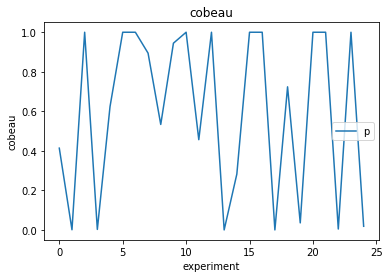

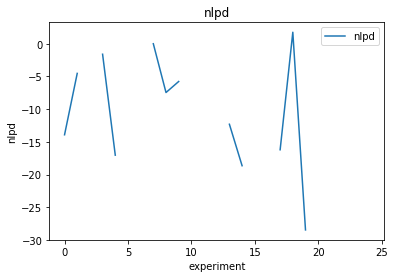

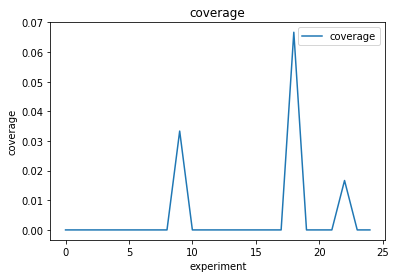

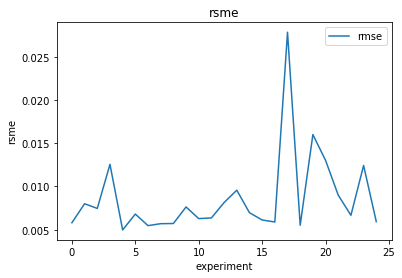

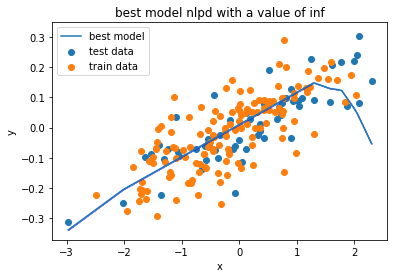

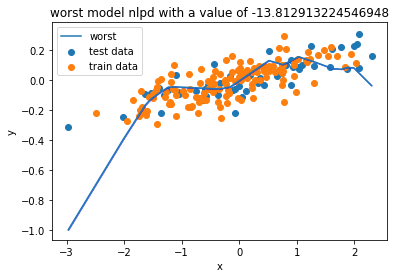

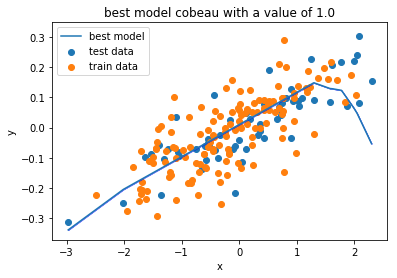

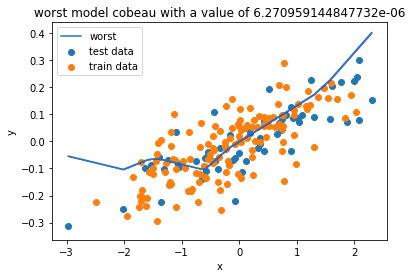

In [11]:
pd_bootstrap = repeat_experiment(ensembles.ForcedDiversityBootstrapThroughTime3, dataset_creation.LinearDataset,
                                 num_meta_epochs=num_meta_epochs,
                                 model_params=forceddiversity_params,
                                 dataset_params=dataset_params)

## NLPD

{   'params': {   'activations': [   <function sigmoid at 0x11f7256a8>,
                                     <function sigmoid at 0x11f7256a8>,
                                     <function sigmoid at 0x11f7256a8>],
                  'initialisation_scheme': <function xavier_initializer at 0x1a25821400>,
                  'learning_rate': 0.001,
                  'num_neurons': [2, 3, 2],
                  'seed': 50}

In [12]:
nlpd_params = {'initialisation_scheme':tf.contrib.layers.xavier_initializer, #tf.keras.initializers.he_normal,
                        'activations': [tf.sigmoid]*num_layers,
                'seed':100,
                'learning_rate':0.001,
                'num_neurons':[2,3,2],
               'l2':False}

experiment started at 2018-08-11 00:06:07.882571
experiment number 1 took 5.656996965408325 seconds. That means the whole run will probably take 141.42492413520813 more seconds and 2.3570820689201355 more minutes.
experiment number 11 took 5.439344882965088 seconds. That means the whole run will probably take 80.79207821325822 more seconds and 1.346534636887637 more minutes.
experiment number 21 took 5.485358953475952 seconds. That means the whole run will probably take 26.81811224846613 more seconds and 0.4469685374744355 more minutes.
overall, it took 134.58533787727356 seconds with 25 experiments
             cobeau   coverage       nlpd       rsme
count  2.500000e+01  25.000000  25.000000  25.000000
mean   1.482980e-01   0.568667   0.976050   0.035359
std    2.540343e-01   0.301897   0.444911   0.038198
min    9.880740e-17   0.116667   0.241355   0.013238
25%    8.112410e-09   0.250000   0.521760   0.015379
50%    2.026347e-03   0.666667   1.101677   0.016093
75%    1.717691e-01   

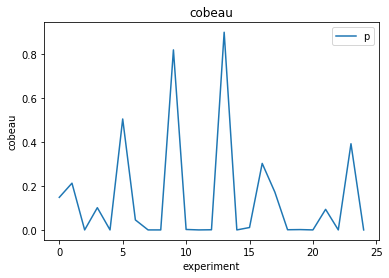

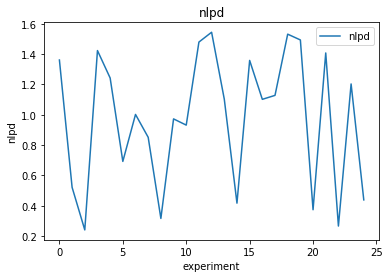

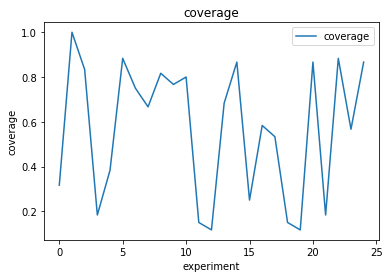

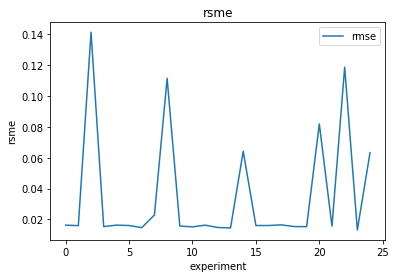

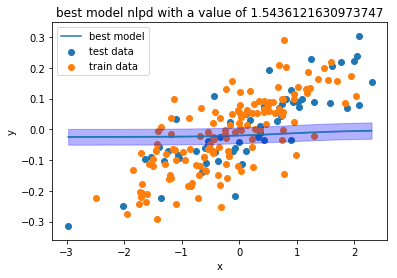

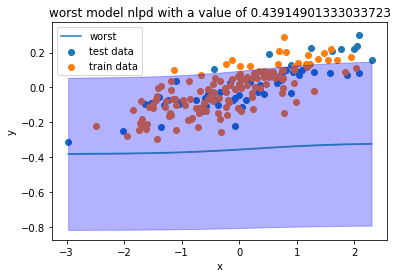

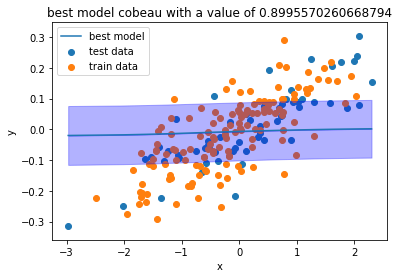

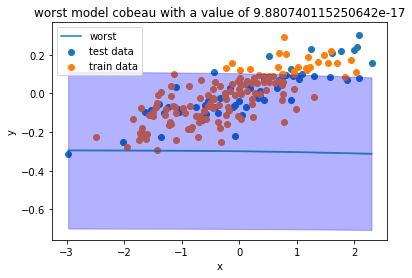

In [13]:
pd_bootstrap = repeat_experiment(networks.NlpdNetwork, dataset_creation.LinearDataset,
                                 num_meta_epochs=num_meta_epochs,
                                 model_params=nlpd_params,
                                 dataset_params=dataset_params)

## Learning Rate
{   'params': {   'activations': [   <function sigmoid at 0x11f7256a8>,
                                     <function sigmoid at 0x11f7256a8>,
                                     <function sigmoid at 0x11f7256a8>],
                  'initialisation_scheme': <function xavier_initializer at 0x1a25821400>,
                  'learning_rate': 0.001,
                  'num_neurons': [2, 3, 2],
                  'seed': 100},

In [14]:
lr_params = {'initialisation_scheme':tf.contrib.layers.xavier_initializer, #tf.keras.initializers.he_normal,
                        'activations': [tf.sigmoid]*num_layers,
                'seed':100,
                'learning_rate':0.001,
                'num_neurons':[2,3,2],
               'l2':False}

experiment started at 2018-08-11 00:08:26.862072
experiment number 1 took 5.516972064971924 seconds. That means the whole run will probably take 137.9243016242981 more seconds and 2.2987383604049683 more minutes.
experiment number 11 took 5.259035110473633 seconds. That means the whole run will probably take 81.84492360461842 more seconds and 1.3640820600769736 more minutes.
experiment number 21 took 5.431144952774048 seconds. That means the whole run will probably take 27.29050346783229 more seconds and 0.4548417244638715 more minutes.
overall, it took 136.53301811218262 seconds with 25 experiments
             cobeau   coverage       nlpd       rsme
count  2.500000e+01  25.000000  25.000000  25.000000
mean   1.613832e-01   0.742667   0.614779   0.067179
std    3.074901e-01   0.227714   0.301847   0.090040
min    2.072957e-17   0.100000   0.090279   0.013959
25%    4.871567e-09   0.683333   0.385691   0.015843
50%    2.772038e-04   0.800000   0.682107   0.016203
75%    1.360778e-01   

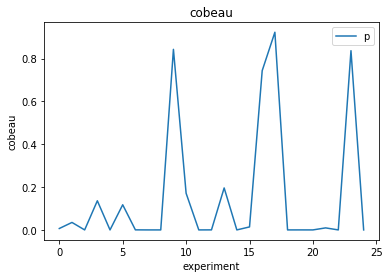

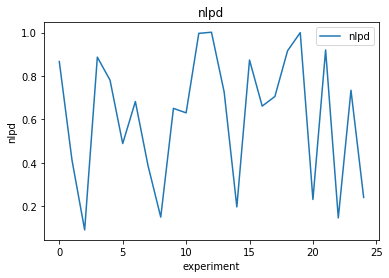

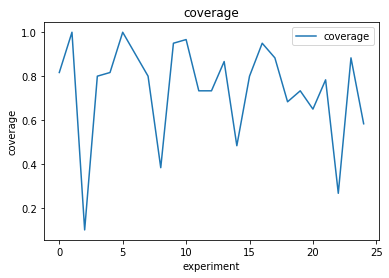

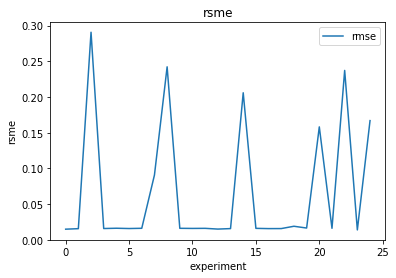

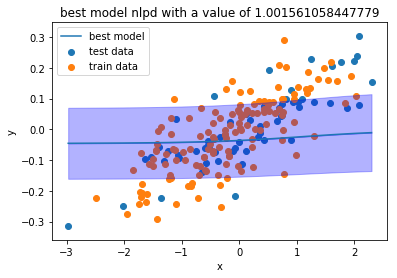

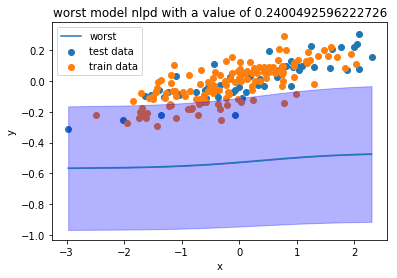

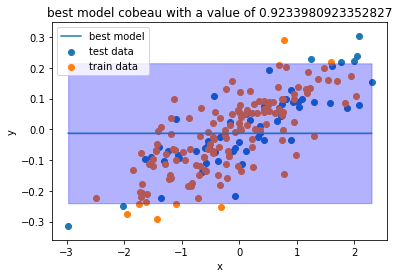

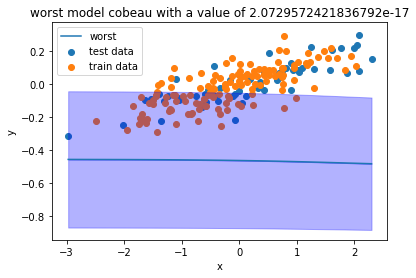

In [15]:
pd_bootstrap = repeat_experiment(networks.LrNetwork, dataset_creation.LinearDataset,
                                 num_meta_epochs=num_meta_epochs,
                                 model_params=lr_params,
                                 dataset_params=dataset_params)

# OTHER

experiment started at 2018-08-11 00:10:47.708556
experiment number 1 took 8.402160167694092 seconds. That means the whole run will probably take 210.0540041923523 more seconds and 3.500900069872538 more minutes.
experiment number 11 took 7.733978986740112 seconds. That means the whole run will probably take 116.8309346112338 more seconds and 1.9471822435205632 more minutes.
experiment number 21 took 7.391639947891235 seconds. That means the whole run will probably take 38.70566731407529 more seconds and 0.6450944552345882 more minutes.
overall, it took 193.32383799552917 seconds with 25 experiments
             cobeau   coverage       nlpd       rsme
count  2.500000e+01  25.000000  25.000000  25.000000
mean   3.079698e-01   0.123333   0.455863   0.015636
std    3.543624e-01   0.069389   4.283360   0.026232
min    1.144262e-13   0.016667 -18.107560   0.005128
25%    1.478502e-02   0.083333   1.474597   0.007041
50%    1.114723e-01   0.116667   1.667536   0.008599
75%    6.379384e-01   0

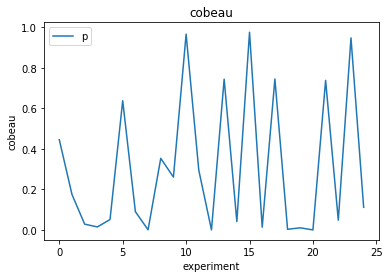

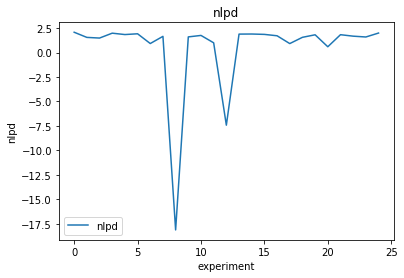

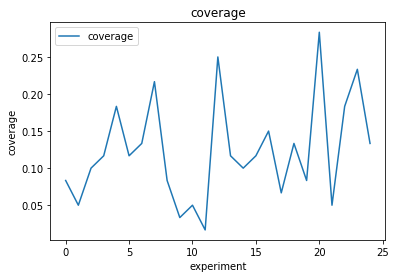

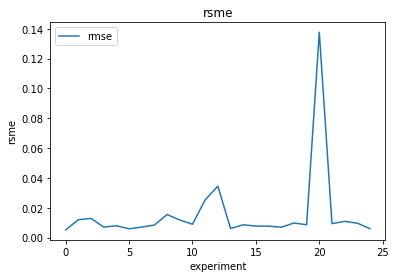

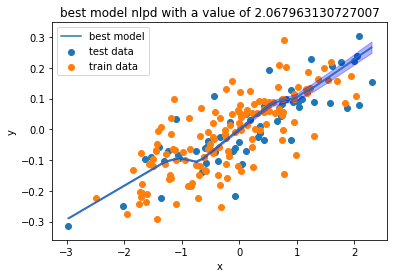

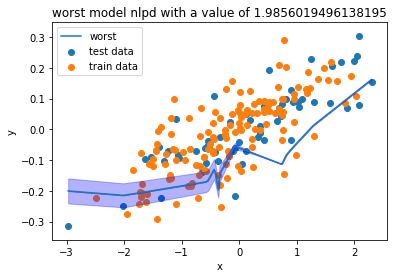

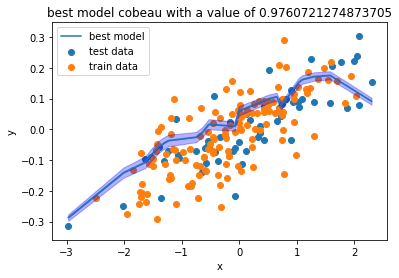

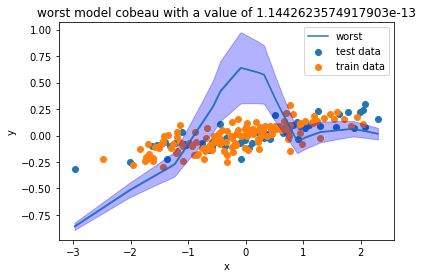

In [16]:
pd1 = repeat_experiment(NlpdNetwork, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-11 00:14:05.499638
experiment number 1 took 8.194996118545532 seconds. That means the whole run will probably take 204.8749029636383 more seconds and 3.4145817160606384 more minutes.
experiment number 11 took 7.7526679039001465 seconds. That means the whole run will probably take 118.90541130846196 more seconds and 1.9817568551410327 more minutes.
experiment number 21 took 7.881446123123169 seconds. That means the whole run will probably take 39.41497899237133 more seconds and 0.6569163165395222 more minutes.
overall, it took 197.1204068660736 seconds with 25 experiments
             cobeau   coverage        nlpd       rsme
count  2.500000e+01  25.000000   25.000000  25.000000
mean   2.290110e-01   0.159333   -5.430836   0.029446
std    2.918724e-01   0.173678   32.301002   0.076026
min    2.125015e-12   0.050000 -160.396573   0.004825
25%    3.796446e-03   0.083333   -0.129484   0.007866
50%    7.883635e-02   0.100000    1.334027   0.010434
75%    3.73611

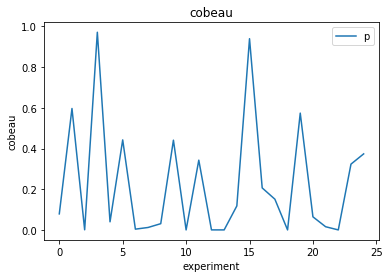

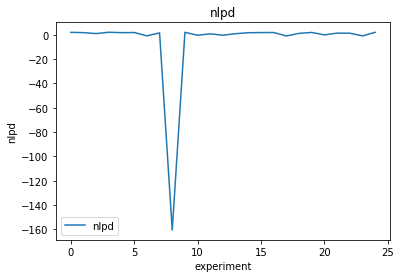

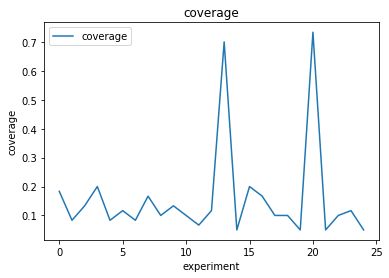

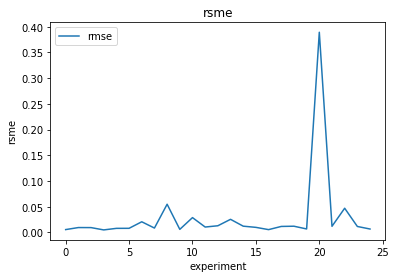

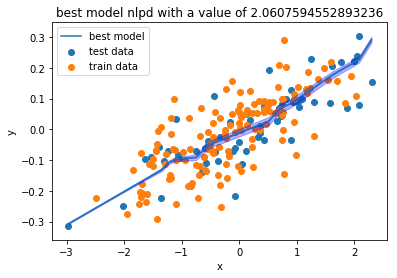

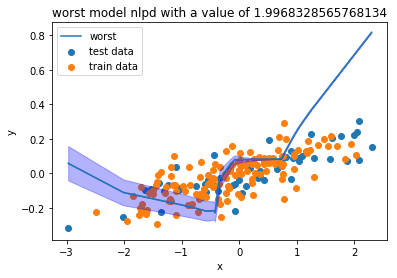

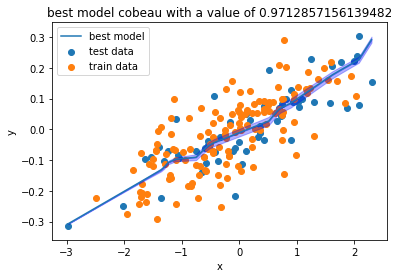

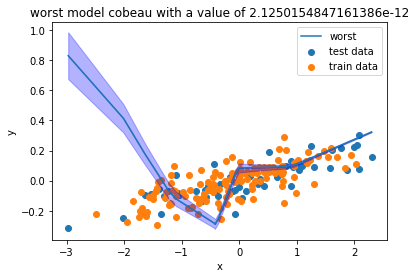

In [17]:
pd2 = repeat_experiment(LrNetwork, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# Nonlinear


In [18]:
#num_meta_epochs = 5#10
#num_epochs = 10#15#50 #10
seed = 42+42

model_params = {'num_epochs':num_epochs,'seed':seed,'num_neurons':[4, 5,5, 4, 2]}#[5,5,5]}#

dataset_params = {'num_samples':num_samples,'seed':seed}

learning_rate = 1/num_epochs
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,'num_epochs':num_epochs,'seed':seed,
               'l2':True}#{'num_epochs':num_epochs,'learning_rate':learning_rate,'initialisation_scheme':tf.keras.initializers.he_normal}
importlib.reload(dataset_creation)

<module 'dataset_creation' from '/Users/thomas/Documents/Master-Thesis/new_version/dataset_creation.py'>

experiment started at 2018-08-11 00:17:26.928373
experiment number 1 took 5.4442408084869385 seconds. That means the whole run will probably take 136.10602021217346 more seconds and 2.268433670202891 more minutes.
experiment number 11 took 5.373207092285156 seconds. That means the whole run will probably take 80.03391395915638 more seconds and 1.3338985659859397 more minutes.
experiment number 21 took 5.1913909912109375 seconds. That means the whole run will probably take 26.62336071332296 more seconds and 0.44372267855538267 more minutes.
overall, it took 133.47194290161133 seconds with 25 experiments
             cobeau   coverage       nlpd       rsme
count  2.500000e+01  25.000000  25.000000  25.000000
mean   1.633005e-01   0.428000   0.476699   0.187371
std    3.071164e-01   0.099154   0.342268   0.230430
min    4.470671e-45   0.216667  -1.029113   0.081871
25%    4.603188e-19   0.350000   0.493142   0.115795
50%    1.701698e-03   0.416667   0.575998   0.137428
75%    8.240155e-02

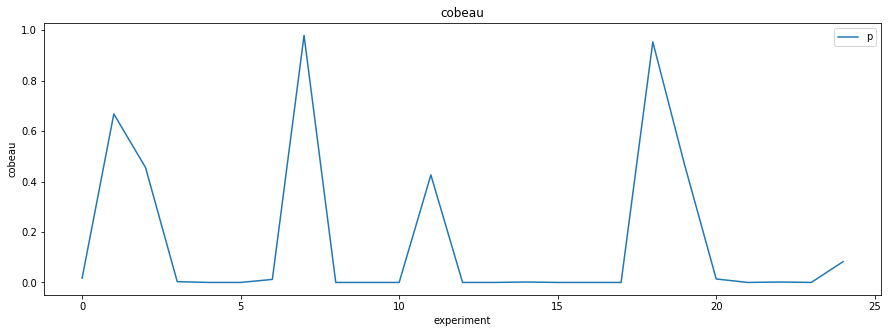

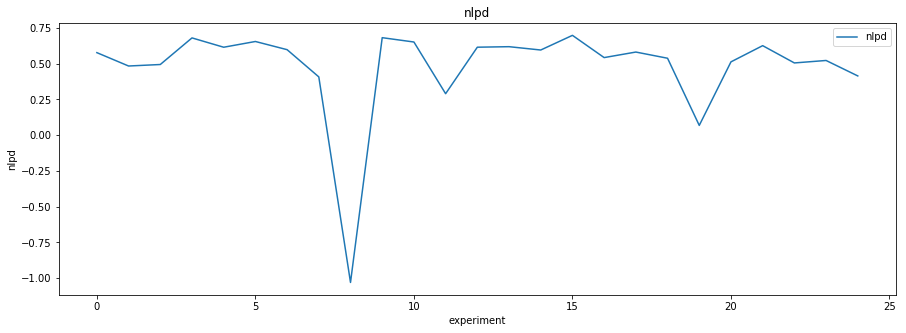

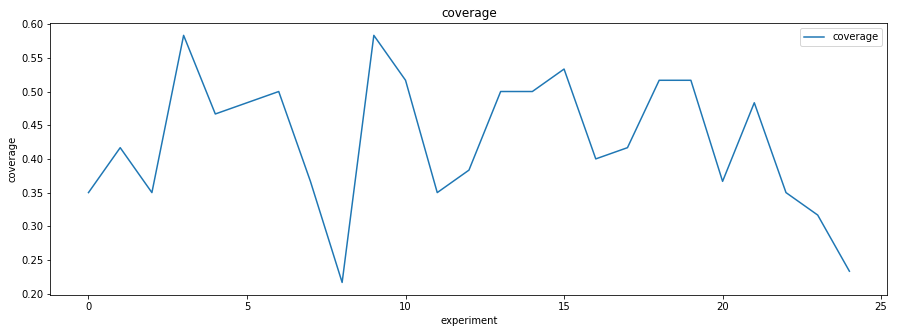

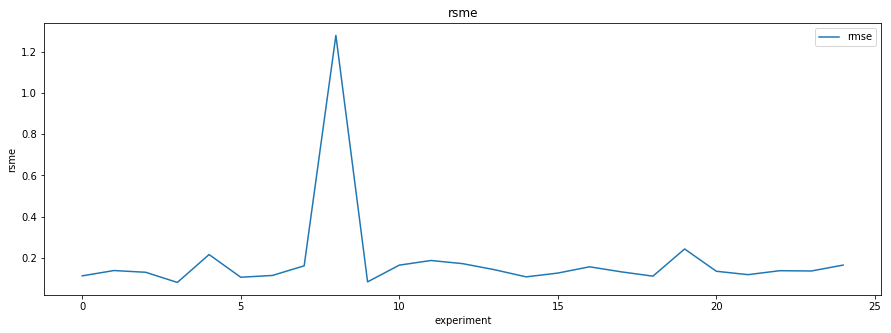

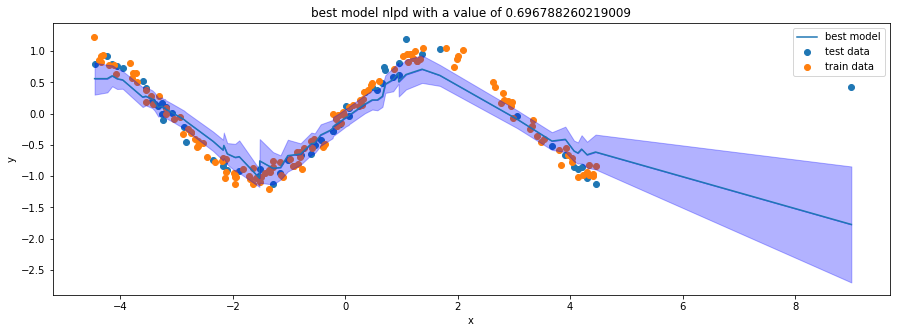

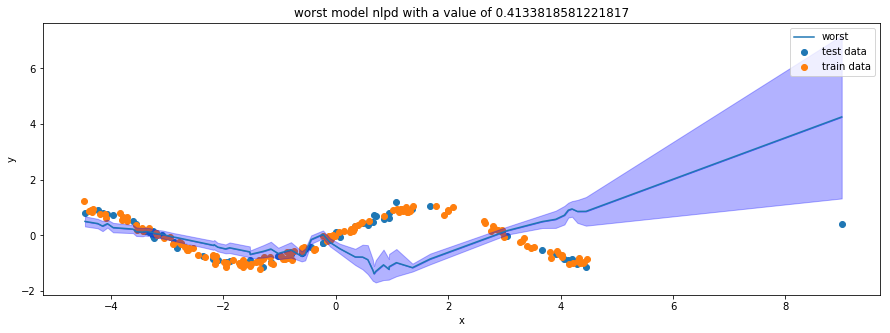

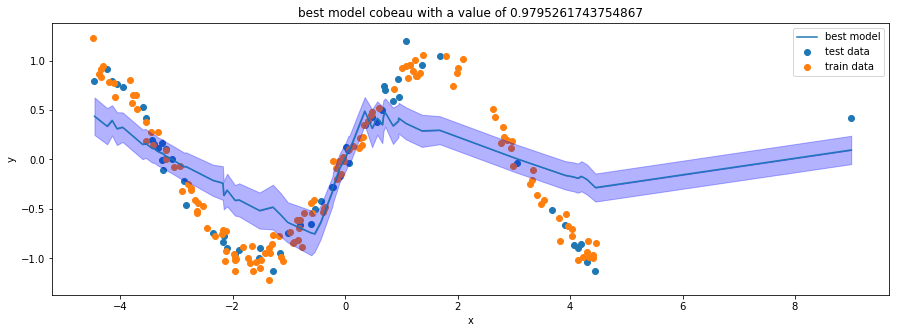

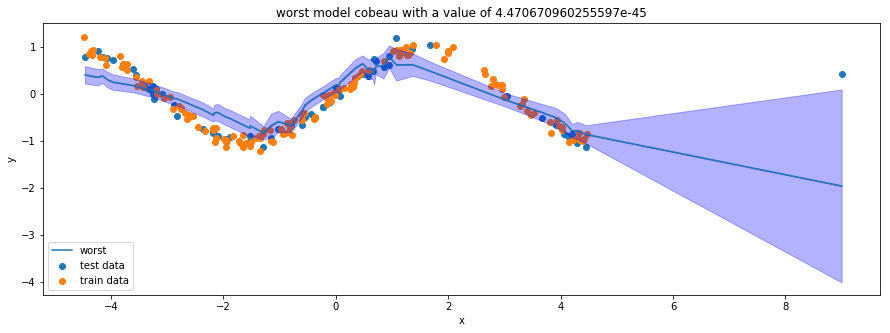

In [19]:
pd11 = repeat_experiment(DropoutNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-11 00:19:45.221512
experiment number 1 took 7.778585910797119 seconds. That means the whole run will probably take 194.46464776992798 more seconds and 3.241077462832133 more minutes.
experiment number 11 took 7.720890045166016 seconds. That means the whole run will probably take 114.9897749857469 more seconds and 1.9164962497624485 more minutes.
experiment number 21 took 7.564711093902588 seconds. That means the whole run will probably take 39.79743764514015 more seconds and 0.6632906274190025 more minutes.
overall, it took 203.52651715278625 seconds with 25 experiments
             cobeau   coverage       nlpd       rsme
count  2.500000e+01  25.000000  25.000000  25.000000
mean   2.930120e-01   0.346667  -1.777226   0.244297
std    3.233332e-01   0.139692   5.686172   0.277645
min    3.412130e-38   0.133333 -23.959342   0.031138
25%    1.868743e-02   0.233333  -0.494477   0.085473
50%    8.066255e-02   0.333333  -0.071815   0.152548
75%    5.296618e-01   

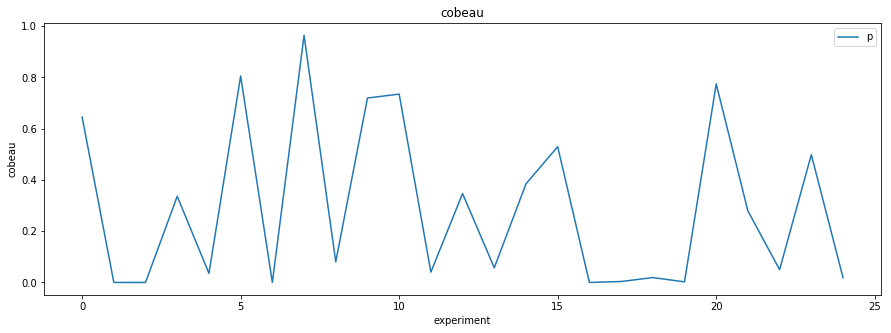

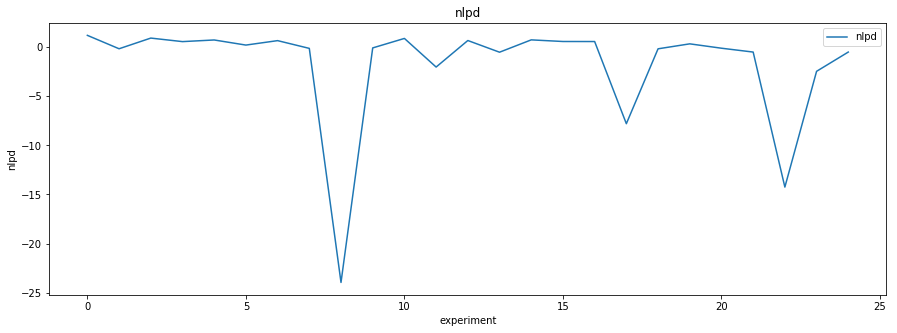

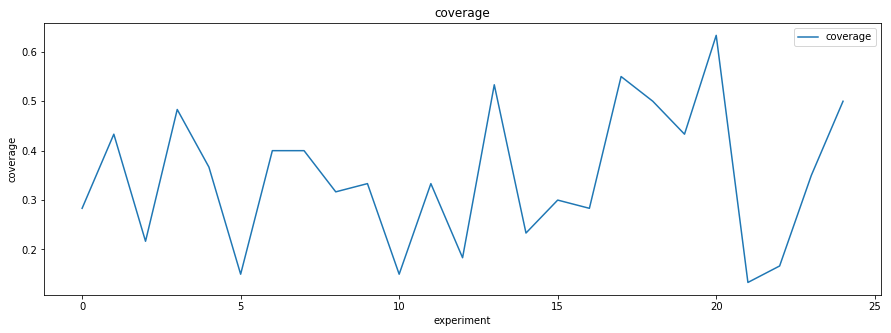

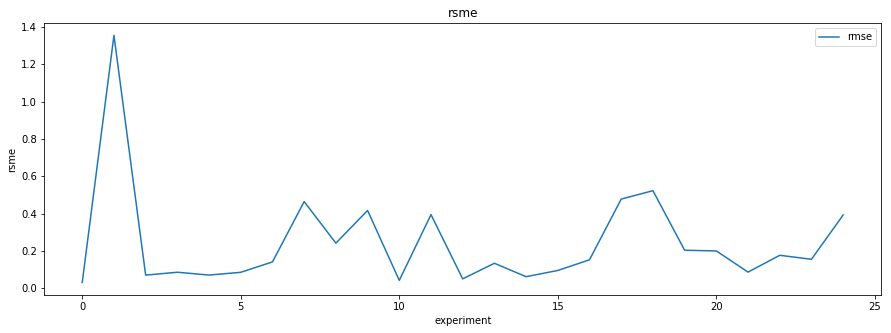

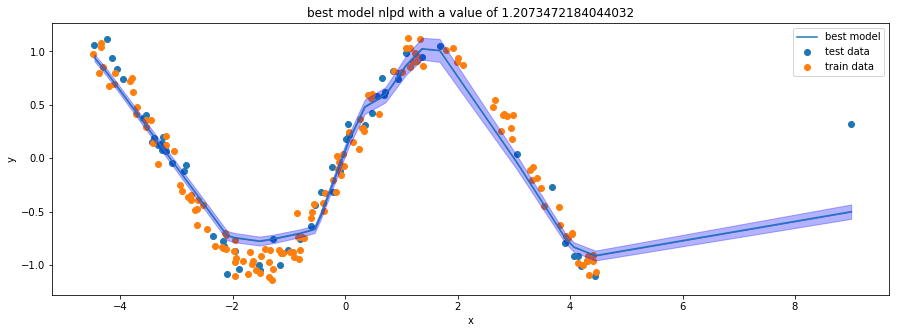

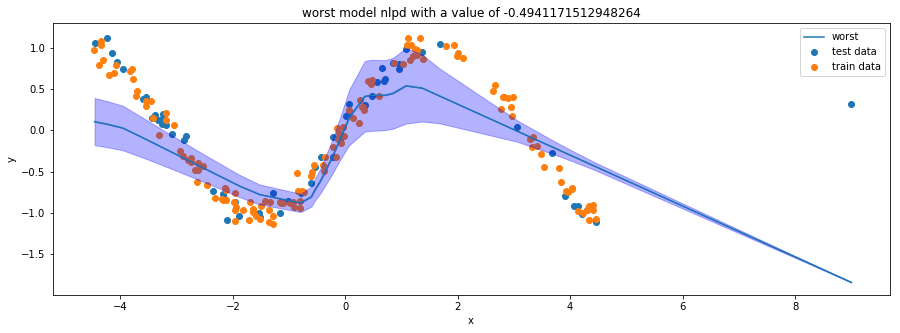

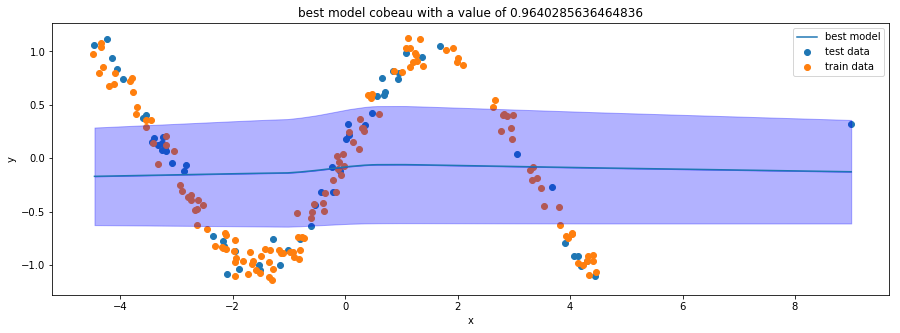

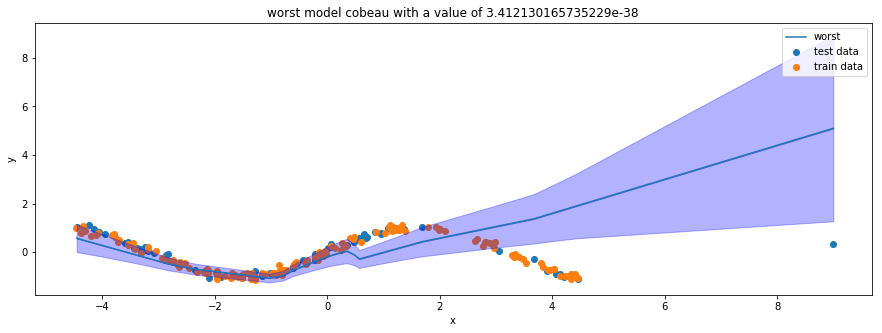

In [20]:
pd22 = repeat_experiment(NlpdNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-11 00:23:13.687921
experiment number 1 took 6.809228897094727 seconds. That means the whole run will probably take 170.23072242736816 more seconds and 2.8371787071228027 more minutes.
experiment number 11 took 6.366456031799316 seconds. That means the whole run will probably take 98.75269597226924 more seconds and 1.6458782662044873 more minutes.
experiment number 21 took 6.514710903167725 seconds. That means the whole run will probably take 32.47022220066616 more seconds and 0.5411703700111026 more minutes.
overall, it took 162.1533260345459 seconds with 25 experiments
          cobeau   coverage         nlpd       rsme
count  25.000000  25.000000    25.000000  25.000000
mean    0.332531   0.277333  -137.709638   0.186086
std     0.252125   0.112101   314.028112   0.146515
min     0.013278   0.116667 -1108.444096   0.061154
25%     0.109961   0.200000   -49.445771   0.103131
50%     0.284233   0.266667   -10.515482   0.168348
75%     0.572868   0.300000  

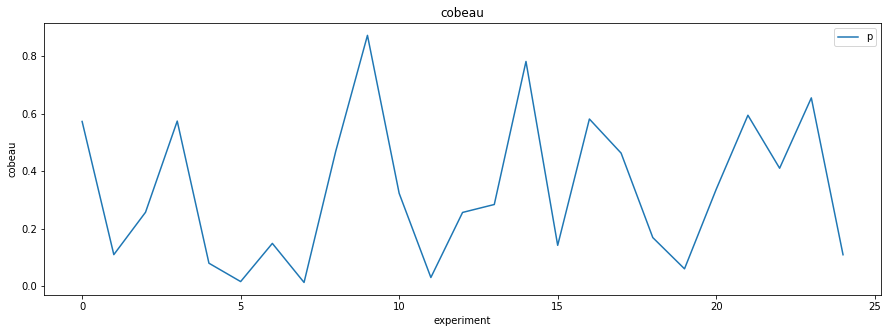

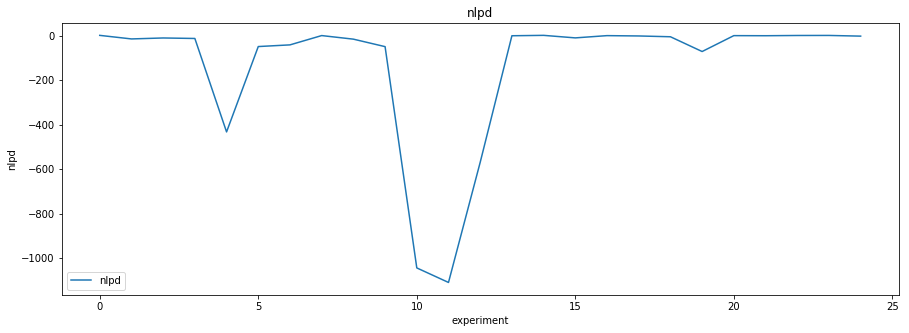

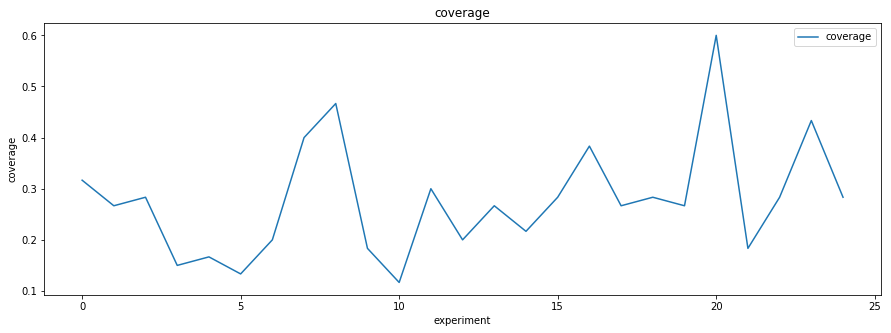

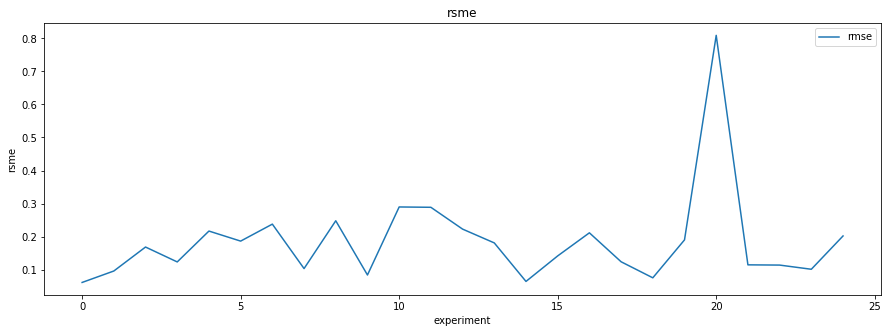

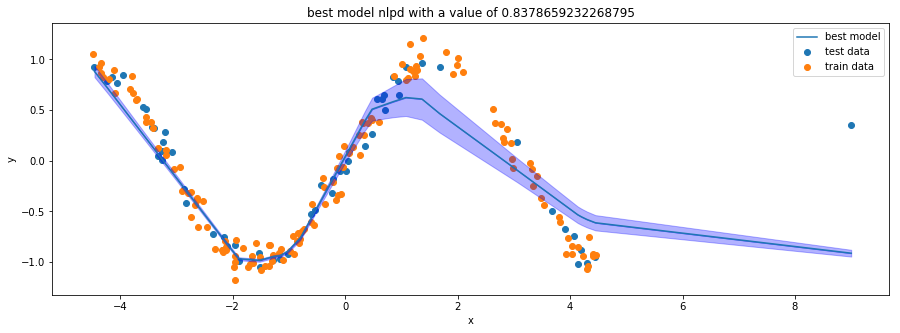

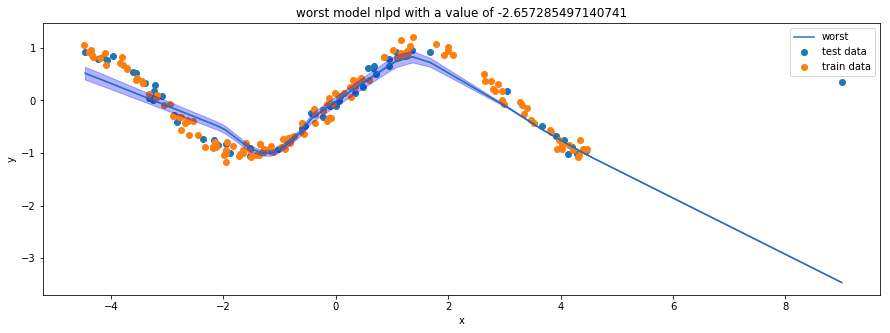

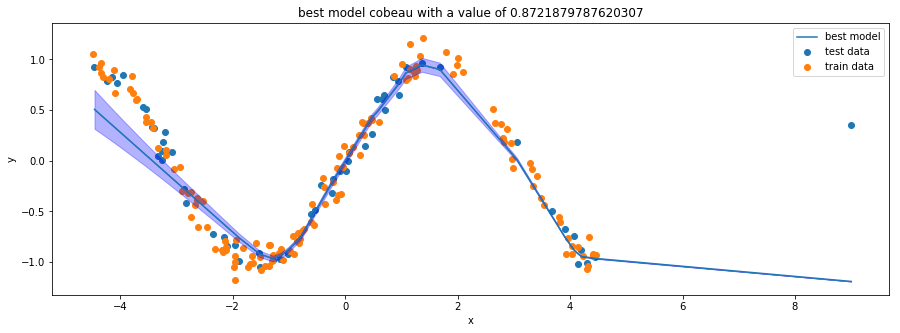

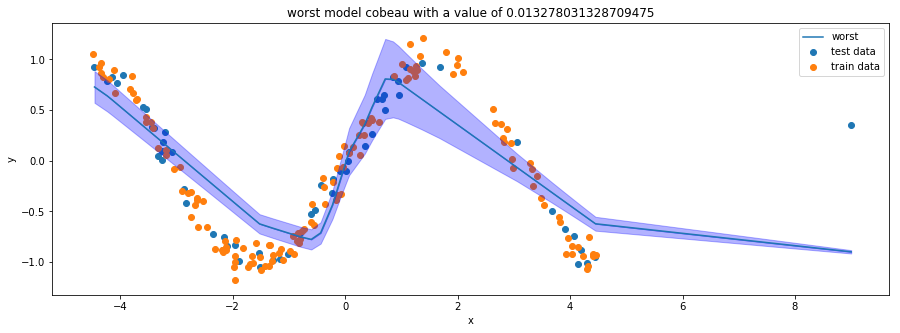

In [21]:
pd33 = repeat_experiment(LrNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# X3

In [22]:
importlib.reload(dataset_creation)

dataset_params = {'seed':seed,'num_samples':num_samples,'scope':7}


experiment started at 2018-08-11 00:26:01.059008
experiment number 1 took 5.946702241897583 seconds. That means the whole run will probably take 148.66755604743958 more seconds and 2.4777926007906594 more minutes.
experiment number 11 took 5.465462923049927 seconds. That means the whole run will probably take 81.90995790741661 more seconds and 1.36516596512361 more minutes.
experiment number 21 took 5.311314821243286 seconds. That means the whole run will probably take 27.132316941306705 more seconds and 0.45220528235511176 more minutes.
overall, it took 135.49861812591553 seconds with 25 experiments
             cobeau   coverage        nlpd        rsme
count  2.500000e+01  25.000000   25.000000   25.000000
mean   3.928696e-04   0.743051  -80.738663  278.175890
std    9.921594e-04   0.058033   51.509697   38.497497
min    6.461049e-13   0.644068 -200.148177  211.127900
25%    2.180332e-08   0.711864 -124.380551  239.169707
50%    1.335670e-06   0.728814  -58.629316  279.463853
75%    

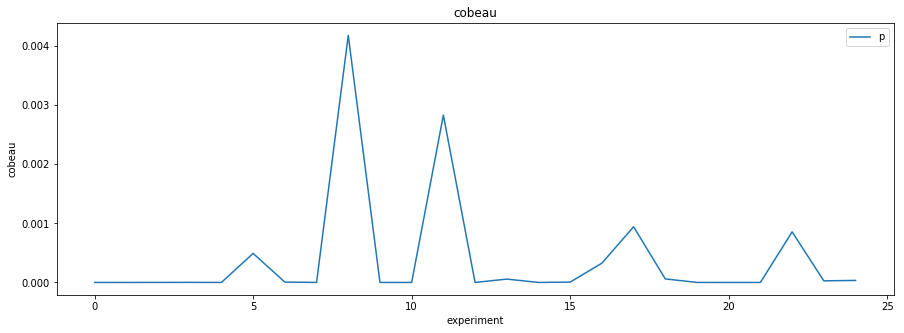

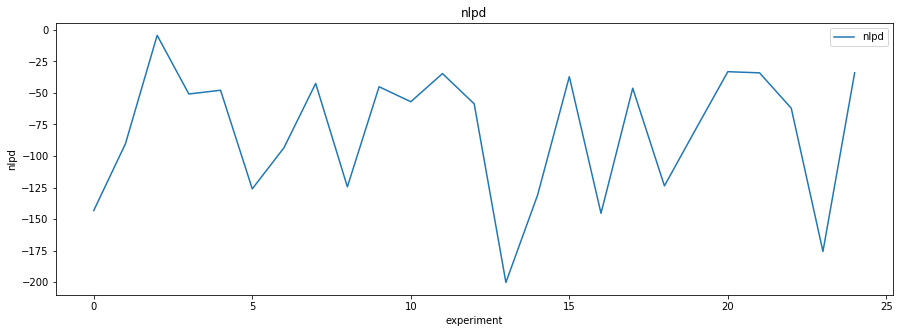

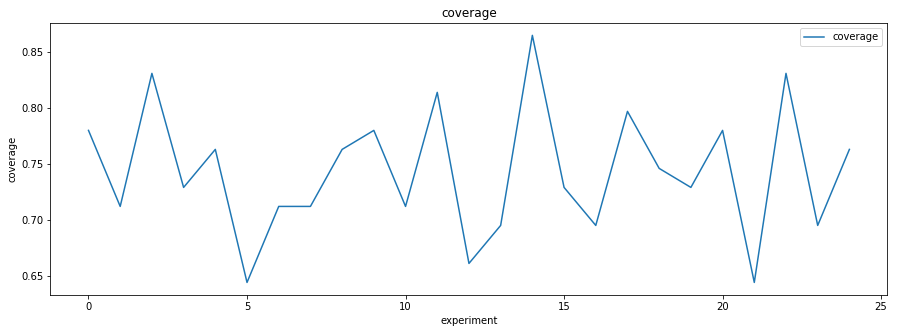

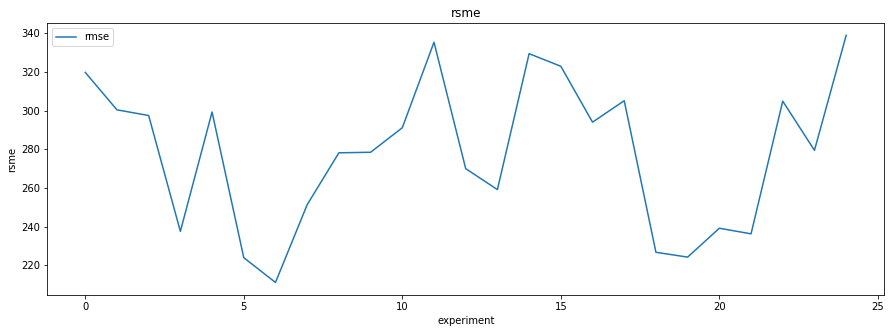

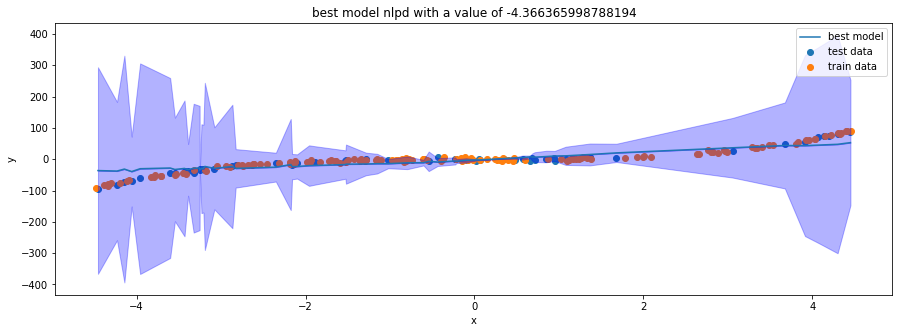

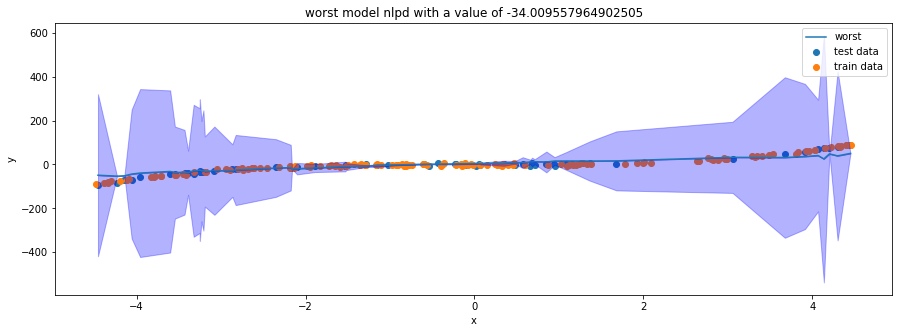

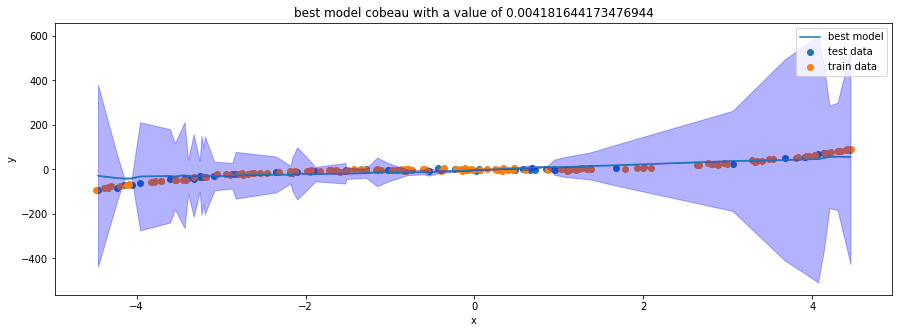

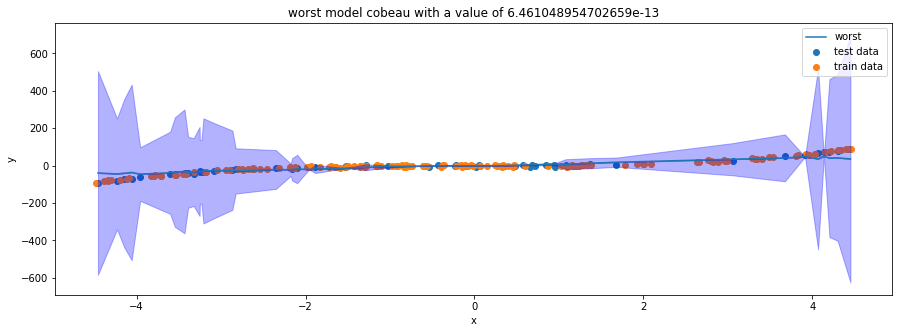

In [23]:


pd111 = repeat_experiment(DropoutNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,
                          model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-11 00:28:21.408185
experiment number 1 took 8.305066347122192 seconds. That means the whole run will probably take 207.6266586780548 more seconds and 3.4604443113009133 more minutes.
experiment number 11 took 7.833294153213501 seconds. That means the whole run will probably take 116.43850792538036 more seconds and 1.9406417987563394 more minutes.
experiment number 21 took 7.788520812988281 seconds. That means the whole run will probably take 39.25178715160915 more seconds and 0.6541964525268191 more minutes.
overall, it took 195.7342460155487 seconds with 25 experiments
             cobeau   coverage           nlpd         rsme
count  2.500000e+01  25.000000      25.000000    25.000000
mean   2.302366e-02   0.636610  -74855.069996  1125.093521
std    1.058853e-01   0.242235  172738.044813   574.402148
min    3.219033e-15   0.203390 -670081.643108   264.821386
25%    1.133750e-07   0.491525     -57.651911   634.040039
50%    2.111765e-06   0.559322     -34.

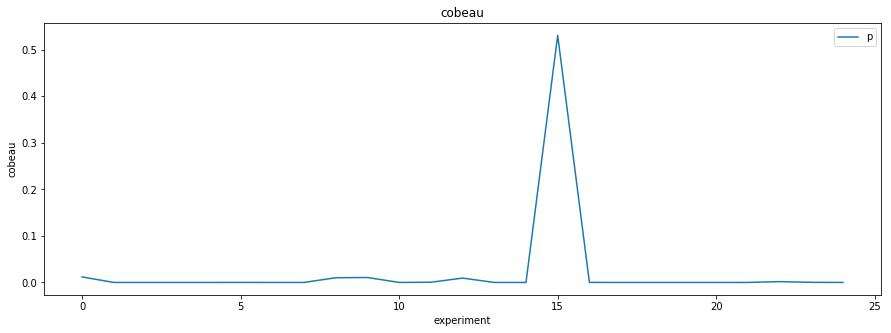

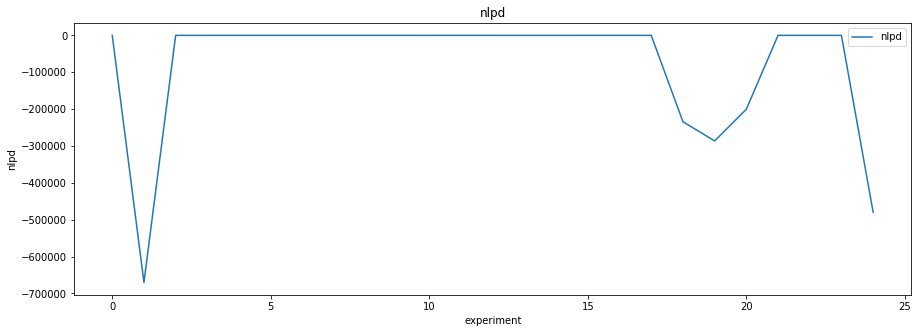

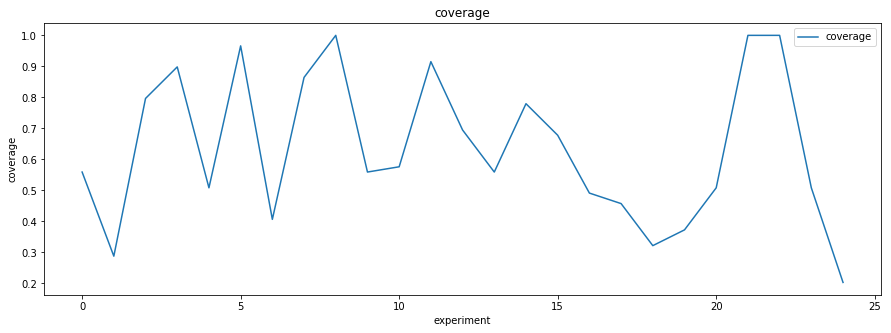

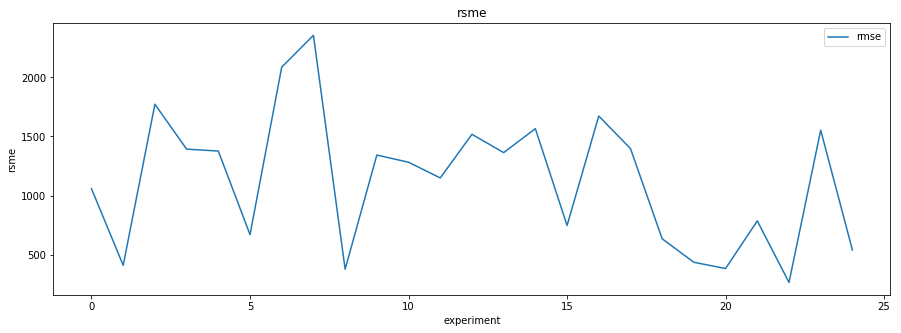

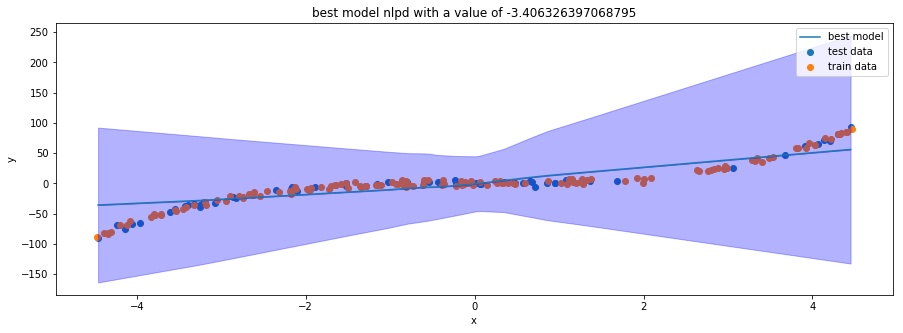

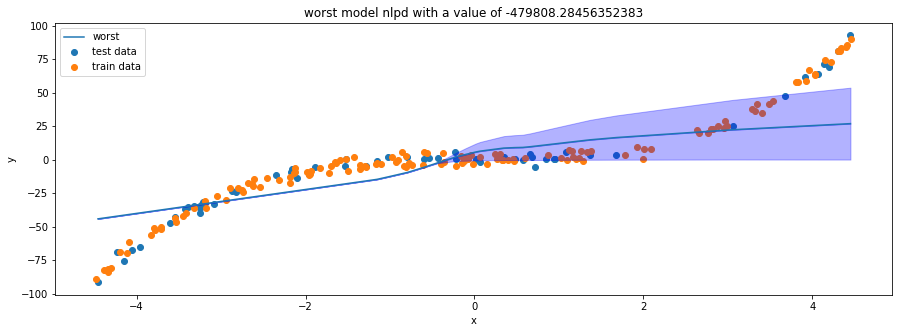

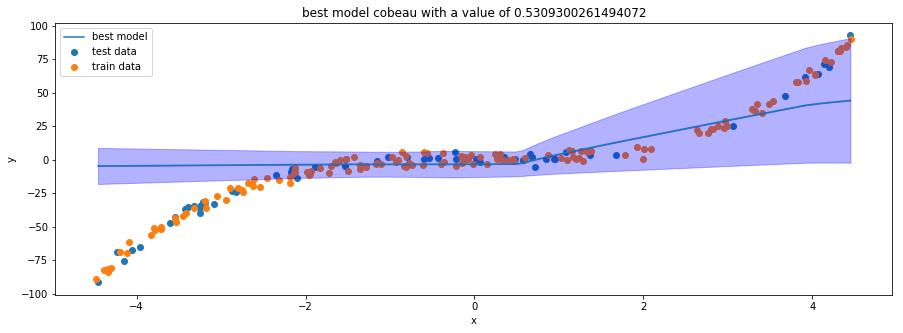

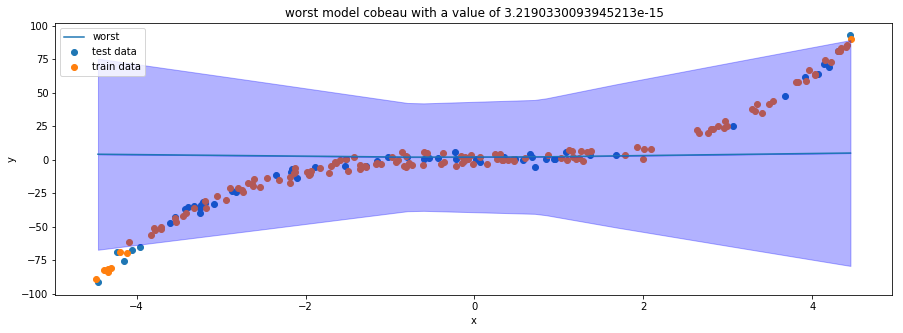

In [24]:
pd222 = repeat_experiment(NlpdNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-11 00:31:42.130487
experiment number 1 took 6.450932025909424 seconds. That means the whole run will probably take 161.2733006477356 more seconds and 2.6878883441289267 more minutes.
experiment number 11 took 6.442211866378784 seconds. That means the whole run will probably take 97.07066189159046 more seconds and 1.617844364859841 more minutes.
experiment number 21 took 6.438957214355469 seconds. That means the whole run will probably take 32.328888575236 more seconds and 0.5388148095872667 more minutes.
overall, it took 161.86648225784302 seconds with 25 experiments
             cobeau   coverage           nlpd        rsme
count  2.500000e+01  25.000000      25.000000   25.000000
mean   8.113187e-02   0.960000  -28478.502561  300.478622
std    1.829586e-01   0.156407  142373.098156  157.116245
min    1.551648e-13   0.220339 -711869.373656   94.816285
25%    2.310898e-10   1.000000      -4.124171  187.885981
50%    2.714796e-07   1.000000      -3.304305  3

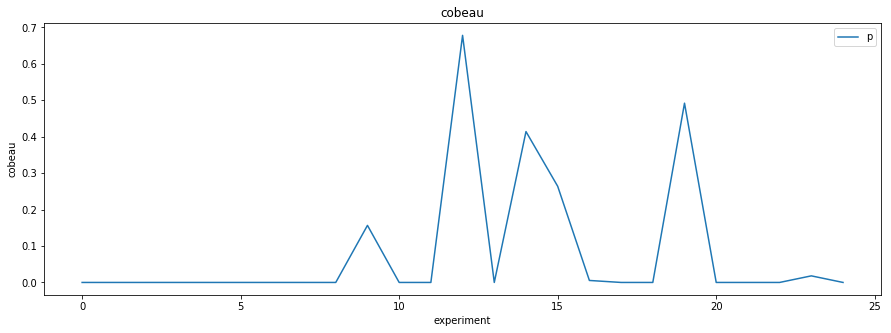

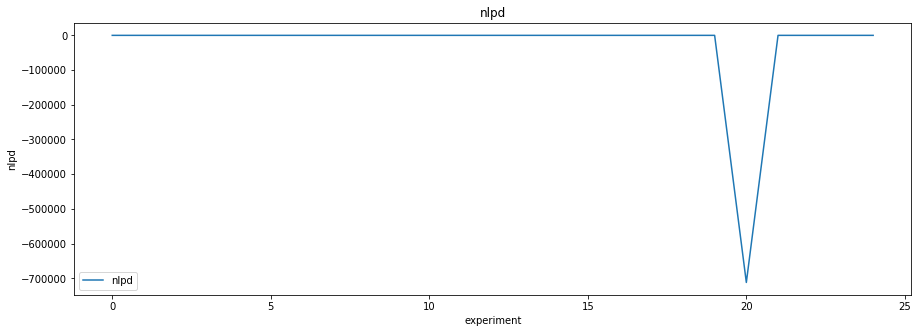

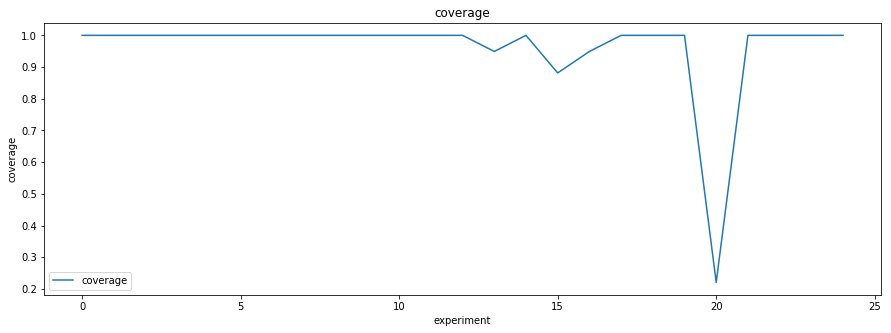

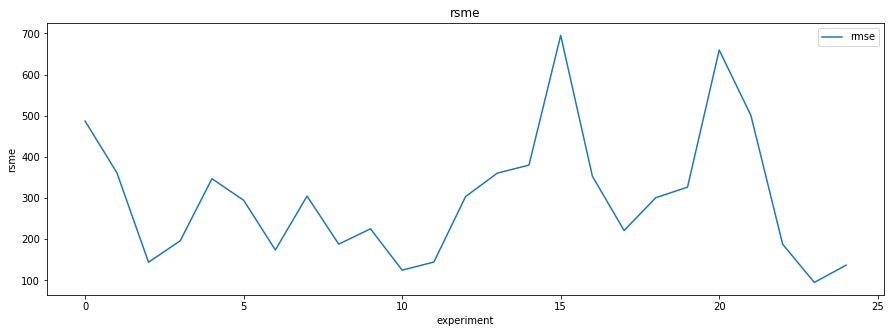

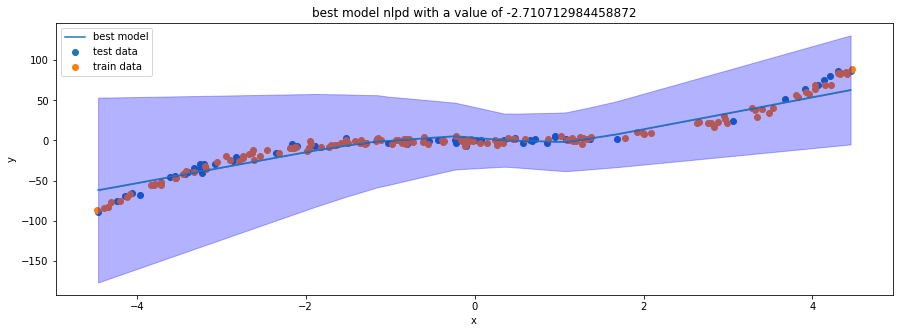

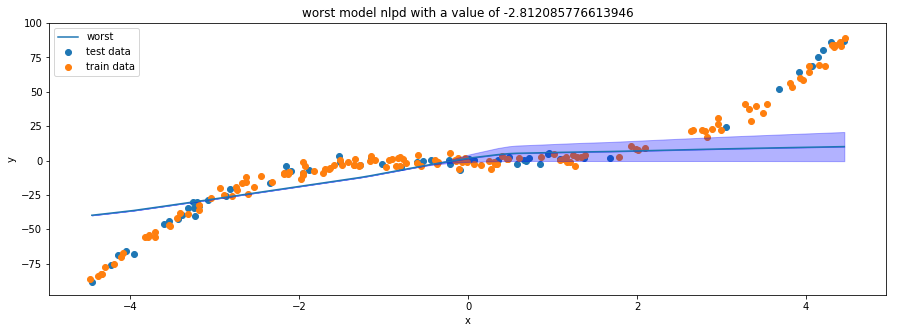

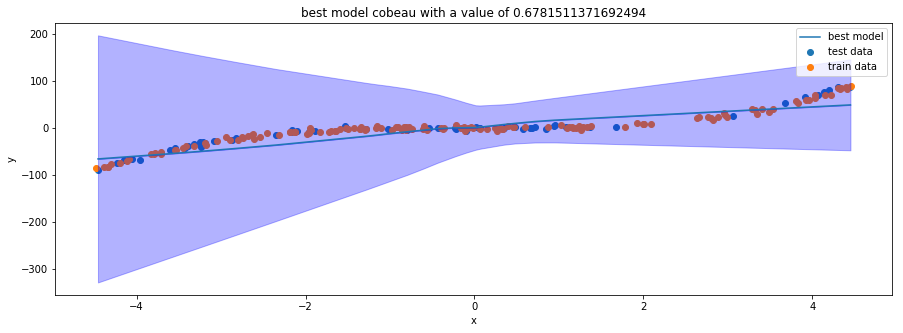

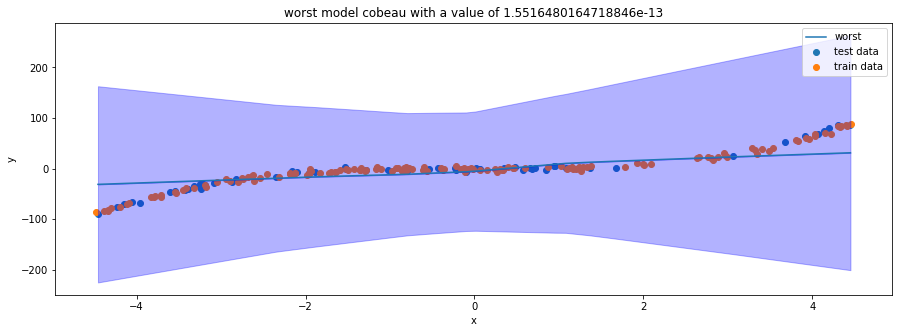

In [25]:
pd333 = repeat_experiment(LrNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)